In [2]:
# imports
import ipdb, os, re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

## Switch context

In [3]:
# # path_to_source = f"/nfs/home/kabenamualus/Research/task-dataset-metric-nli-extraction/data/pwc_ibm_150_5_10_10000/10Neg10000unk/twofoldwithunk"
# path_to_source = f"/nfs/home/kabenamualus/Research/task-dataset-metric-nli-extraction/data/pwc_latex_text/PWC_latex_5_10_10000_compare/twofoldwithunk"
path_to_source = f"/nfs/home/kabenamualus/Research/task-dataset-metric-nli-extraction/data/pwc_ibm_full_5_10_10000_clone_latex_compare/10Neg10000unk/twofoldwithunk"

# path_to_clone = f"/nfs/home/kabenamualus/Research/task-dataset-metric-nli-extraction/data/pwc_ibm_150_5_10_10000/10Neg10000unk/twofoldwithunk"
# path_to_clone = f"/nfs/home/kabenamualus/Research/task-dataset-metric-nli-extraction/data/pwc_ibm_full_5_10_800/twofoldwithunk"
path_to_clone = f"/nfs/home/kabenamualus/Research/task-dataset-metric-nli-extraction/data/pwc_latex_text/PWC_latex_5_10_10000/twofoldwithunk"

In [4]:
fold = "fold1"
train_source_pd = pd.read_csv(f"{path_to_source}/{fold}/train.tsv", 
                    sep="\t", names=["label", "title", "TDM", "Context"])

dev_source_pd = pd.read_csv(f"{path_to_source}/{fold}/dev.tsv", 
                    sep="\t", names=["label", "title", "TDM", "Context"])


train_clone_pd = pd.read_csv(f"{path_to_clone}/{fold}/train.tsv", 
                    sep="\t", names=["label", "title", "TDM", "Context"])

dev_clone_pd = pd.read_csv(f"{path_to_clone}/{fold}/dev.tsv", 
                    sep="\t", names=["label", "title", "TDM", "Context"])

In [5]:
train_source_pd.tail()

,label,title,TDM,Context
41728,False,1905.11946v5.pdf,question_answering; Quasar; F1 (Quasar-T),EfficientNet: Rethinking Model Scaling for Con...
41729,False,1905.11946v5.pdf,language_modeling; Hutter Prize; Bit per Chara...,EfficientNet: Rethinking Model Scaling for Con...
41730,False,1905.11946v5.pdf,language_modeling; 1B Words / Google Billion W...,EfficientNet: Rethinking Model Scaling for Con...
41731,False,1905.11946v5.pdf,Few-Shot Image Classification; Mini-Imagenet 1...,EfficientNet: Rethinking Model Scaling for Con...
41732,False,1905.11946v5.pdf,Click-Through Rate Prediction; Criteo; AUC,EfficientNet: Rethinking Model Scaling for Con...


In [6]:
train_clone_pd.tail()

,label,title,TDM,Context
41728,False,1905.11946v5.pdf,question_answering; Quasar; F1 (Quasar-T),Convolutional Neural Networks (ConvNets) are c...
41729,False,1905.11946v5.pdf,language_modeling; Hutter Prize; Bit per Chara...,Convolutional Neural Networks (ConvNets) are c...
41730,False,1905.11946v5.pdf,language_modeling; 1B Words / Google Billion W...,Convolutional Neural Networks (ConvNets) are c...
41731,False,1905.11946v5.pdf,Few-Shot Image Classification; Mini-Imagenet 1...,Convolutional Neural Networks (ConvNets) are c...
41732,False,1905.11946v5.pdf,Click-Through Rate Prediction; Criteo; AUC,Convolutional Neural Networks (ConvNets) are c...


In [7]:
train_source_pd[train_source_pd.label==True].head()

,label,title,TDM,Context
0,True,1707.03497v2.pdf,Atari Games; Atari 2600 Seaquest; Score,Value Prediction Network This paper proposes a...
1,True,1707.03497v2.pdf,Atari Games; Atari 2600 Amidar; Score,Value Prediction Network This paper proposes a...
2,True,1707.03497v2.pdf,Atari Games; Atari 2600 Krull; Score,Value Prediction Network This paper proposes a...
3,True,1707.03497v2.pdf,Atari Games; Atari 2600 Alien; Score,Value Prediction Network This paper proposes a...
4,True,1707.03497v2.pdf,Atari Games; Atari 2600 Enduro; Score,Value Prediction Network This paper proposes a...


In [8]:
# List of pdf name that are in the test file
list_train_source_pd_uniq = list(train_source_pd.title.unique())
len(list_train_source_pd_uniq)

2951

In [9]:
# List of pdf name that are in the train file
list_dev_source_pd_uniq = list(dev_source_pd.title.unique())
len(list_dev_source_pd_uniq)

1258

In [10]:
# total number of uniq pdf in the train and testing
len(list_train_source_pd_uniq)+len(list_dev_source_pd_uniq)

4209

In [11]:
# List of pdf name that are in the train file
list_train_clone_pd_uniq = list(train_clone_pd.title.unique())
len(list_train_clone_pd_uniq)

2951

In [12]:
# List of pdf name that are in the train file
list_dev_clone_pd_uniq = list(dev_clone_pd.title.unique())
len(list_dev_clone_pd_uniq)

1258

In [13]:
# total number of uniq pdf in the train and testing
len(list_train_clone_pd_uniq)+len(list_dev_clone_pd_uniq)

4209

In [14]:
# Dict to contains new context

dict_train_source_paper_context = {}
for paper in list_train_source_pd_uniq:
    dict_train_source_paper_context[paper]=train_source_pd[train_source_pd.title==paper].Context.values[0]
for paper in list_dev_source_pd_uniq:
    dict_train_source_paper_context[paper]=dev_source_pd[dev_source_pd.title==paper].Context.values[0]
    
dict_train_clone_paper_context = {}
for paper in list_train_clone_pd_uniq:
    dict_train_clone_paper_context[paper]=train_clone_pd[train_clone_pd.title==paper].Context.values[0]
for paper in list_dev_clone_pd_uniq:
    dict_train_clone_paper_context[paper]=dev_clone_pd[dev_clone_pd.title==paper].Context.values[0]

In [15]:
def get_start_lenght(dictionary, limit="150", title="", savefig=False):
    # Stats
    len_context = []
    short_context = 0
    paper_to_short_context = {}
    
    for paper, context in dictionary.items():
        len_context.append(len(context.split()))
        if len(context.split()) <= 50 :
            short_context += 1
            paper_to_short_context[paper] = len(context.split()) 
    
    print(f"Context TDM limit {limit}:")
    print(f"Mean lenght: {np.mean(len_context)}")
    print(f"Max lenght: {np.max(len_context)}")
    print(f"Min lenght: {np.min(len_context)}")
    print(f"Std lenght: {np.std(len_context)}")
    print(f"Lenght paper with context less than 10: {len(paper_to_short_context)}")
    
    x = np.arange(1, len(len_context)+1, 1)
    y = len_context

    plt.plot(x, y)

    plt.title(title)
    plt.xlabel("number of papers")
    plt.ylabel("lenght DocTAET")
    if savefig:
        plt.savefig(fname=re.sub(r"[0-9]+", '', title).strip())
    plt.show()
    
    return paper_to_short_context

Context TDM limit None:
Mean lenght: 513.3689712520788
Max lenght: 2686
Min lenght: 101
Std lenght: 263.735437674214
Lenght paper with context less than 10: 0


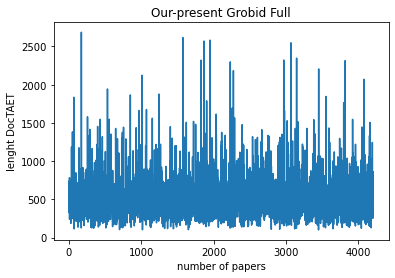

In [17]:
len_context_150 = get_start_lenght(dict_train_source_paper_context, 
                                   limit="None", 
                                   title="Our-present Grobid Full",
                                   savefig=True)

Context TDM limit None:
Mean lenght: 685.2520788785935
Max lenght: 7374
Min lenght: 100
Std lenght: 442.4167283742035
Lenght paper with context less than 10: 0


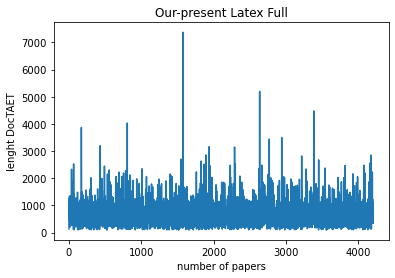

In [19]:
len_context_150 = get_start_lenght(dict_train_clone_paper_context, 
                                   limit="None", 
                                   title="Our-present Latex Full",
                                   savefig=True)

In [48]:
rand_indx = random.randint(0, len(list(dict_train_source_paper_context.keys())))
random_paper = list(dict_train_source_paper_context.keys())[rand_indx]
random_paper

'1907.09504v1.pdf'

In [49]:
dict_train_source_paper_context[random_paper]

"Reservoir Computing Models for Patient-Adaptable ECG Monitoring in Wearable Devices The reservoir computing paradigm is employed to classify heartbeat anomalies online based on electrocardiogram signals. Inspired by the principles of information processing in the brain, reservoir computing provides a framework to design, train, and analyze recurrent neural networks (RNNs) for processing time-dependent information. Due to its computational efficiency and the fact that training amounts to a simple linear regression, this supervised learning algorithm has been variously considered as a strategy to implement useful computations not only on digital computers but also on emerging unconventional hardware platforms such as neuromorphic microchips. Here, this biological-inspired learning framework is exploited to devise an accurate patient-adaptive model that has the potential to be integrated into wearable cardiac events monitoring devices. The proposed patient-customized model was trained an

In [50]:
dict_train_clone_paper_context[random_paper]

"Reservoir Computing Models for Patient-Adaptable ECG Monitoring in Wearable Devices The reservoir computing paradigm is employed to classify heartbeat anomalies online based on electrocardiogram signals. Inspired by the principles of information processing in the brain, reservoir computing provides a framework to design, train, and analyze recurrent neural networks (RNNs) for processing time-dependent information. Due to its computational efficiency and the fact that training amounts to a simple linear regression, this supervised learning algorithm has been variously considered as a strategy to implement useful computations not only on digital computers but also on emerging unconventional hardware platforms such as neuromorphic microchips. Here, this biological-inspired learning framework is exploited to devise an accurate patient-adaptive model that has the potential to be integrated into wearable cardiac events monitoring devices. The proposed patient-customized model was trained an

In [51]:
train_clone_pd["Context"] = train_clone_pd.apply(lambda x : dict_train_source_paper_context[x['title']] if x['title'] in dict_train_source_paper_context.keys() else "None", axis=1)
train_clone_pd.drop(train_clone_pd.index[train_clone_pd['Context'] == 'None'], inplace = True)
train_clone_pd.reset_index(drop=True, inplace=True)
dev_clone_pd["Context"] = dev_clone_pd.apply(lambda x : dict_train_source_paper_context[x['title']] if x['title'] in dict_train_source_paper_context.keys() else "None", axis=1)
dev_clone_pd.drop(dev_clone_pd.index[dev_clone_pd['Context'] == 'None'], inplace = True)
dev_clone_pd.reset_index(drop=True, inplace=True)

In [52]:
train_source_pd.tail()

,label,title,TDM,Context
49673,False,1912.04799v2.pdf,Time Series Classification; AUSLAN; Accuracy,Learning Depth-Guided Convolutions for Monocul...
49674,False,1912.04799v2.pdf,Sentiment Analysis; Amazon Review Full; Accuracy,Learning Depth-Guided Convolutions for Monocul...
49675,False,1912.04799v2.pdf,Node Classification; Wisconsin; Accuracy,Learning Depth-Guided Convolutions for Monocul...
49676,False,1912.04799v2.pdf,Question Answering; CoQA; Out-of-domain,Learning Depth-Guided Convolutions for Monocul...
49677,False,1912.04799v2.pdf,Fact-based Text Editing; WebEdit; Precision,Learning Depth-Guided Convolutions for Monocul...


In [53]:
train_clone_pd.tail()

,label,title,TDM,Context
41137,False,1909.09051v1.pdf,Semi-Supervised Video Object Segmentation; You...,Self-Supervised Monocular Depth Hints Monocula...
41138,False,1909.09051v1.pdf,Image Clustering; STL-10; Backbone,Self-Supervised Monocular Depth Hints Monocula...
41139,False,1909.09051v1.pdf,"Semi-Supervised Image Classification; SVHN, 10...",Self-Supervised Monocular Depth Hints Monocula...
41140,False,1909.09051v1.pdf,RGB-D Salient Object Detection; NJU2K; Average...,Self-Supervised Monocular Depth Hints Monocula...
41141,False,1909.09051v1.pdf,Question Answering; SQuAD2.0 dev; EM,Self-Supervised Monocular Depth Hints Monocula...


In [54]:
# List of pdf name that are in the test file
list_train_source_pd_uniq = list(train_source_pd.title.unique())
len(list_train_source_pd_uniq)

3753

In [55]:
# List of pdf name that are in the train file
list_dev_source_pd_uniq = list(dev_source_pd.title.unique())
len(list_dev_source_pd_uniq)

1608

In [56]:
dict_train_source_paper_context = {}
for paper in list_train_source_pd_uniq:
    dict_train_source_paper_context[paper]=train_source_pd[train_source_pd.title==paper].Context.values[0]
for paper in list_dev_source_pd_uniq:
    dict_train_source_paper_context[paper]=dev_source_pd[dev_source_pd.title==paper].Context.values[0]

Context TDM limit None:
Mean lenght: 504.3794068270845
Max lenght: 2686
Min lenght: 5
Std lenght: 265.50071944364134
Lenght paper with context less than 10: 3


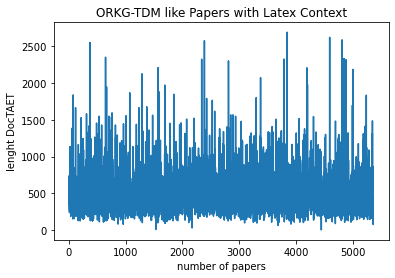

In [57]:
len_context_150 = get_start_lenght(dict_train_source_paper_context, 
                                   limit="None", 
                                   title="ORKG-TDM like Papers with Latex Context")

In [58]:
# List of pdf name that are in the train file
list_train_clone_pd_uniq = list(train_clone_pd.title.unique())
len(list_train_clone_pd_uniq)

2942

In [59]:
# List of pdf name that are in the train file
list_dev_clone_pd_uniq = list(dev_clone_pd.title.unique())
len(list_dev_clone_pd_uniq)

1267

In [60]:
dict_train_clone_paper_context = {}
for paper in list_train_clone_pd_uniq:
    dict_train_clone_paper_context[paper]=train_clone_pd[train_clone_pd.title==paper].Context.values[0]
for paper in list_dev_clone_pd_uniq:
    dict_train_clone_paper_context[paper]=dev_clone_pd[dev_clone_pd.title==paper].Context.values[0]

Context TDM limit None:
Mean lenght: 513.3689712520788
Max lenght: 2686
Min lenght: 101
Std lenght: 263.735437674214
Lenght paper with context less than 10: 0


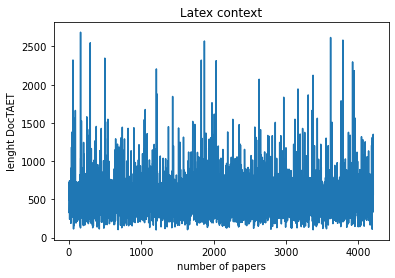

In [61]:
len_context_150 = get_start_lenght(dict_train_clone_paper_context, 
                                   limit="None", 
                                   title="Latex context")

In [62]:
# path_to_clone = f"/nfs/home/kabenamualus/Research/task-dataset-metric-nli-extraction/data/pwc_latex_text/pwc_latex_5_10_10000/twofoldwithunk"
# new_path = f"/nfs/home/kabenamualus/Research/task-dataset-metric-nli-extraction/data/pwc_latex_text/pwc_latex_5_10_10000_clone/twofoldwithunk/{fold}"
new_path = f"/nfs/home/kabenamualus/Research/task-dataset-metric-nli-extraction/data/pwc_ibm_full_5_10_10000_clone_latex_compare/10Neg10000unk/twofoldwithunk/{fold}"
# compare = "_compare"
# new_path_pred = f"/nfs/home/kabenamualus/Research/task-dataset-metric-nli-extraction/data/pwc_ibm_150_5_10_10000{compare}/10Neg10000unk/twofoldwithunk/{fold}/torch/{model_pth_name}"

os.makedirs(new_path) if not os.path.exists(new_path) else "Pass"
# os.makedirs(new_path_pred) if not os.path.exists(new_path_pred) else "Pass"


                              
train_clone_pd.to_csv(path_or_buf=f"{new_path}/train.tsv", 
                 sep="\t", header=None, index=False)

dev_clone_pd.to_csv(path_or_buf=f"{new_path}/dev.tsv", 
                 sep="\t", header=None, index=False)

# Pred_pd.to_csv(path_or_buf=f"{new_path_pred}/test_results_Bert.tsv", 
#                  sep="\t", header=None, index=False)
# Pred_pd.to_csv(path_or_buf=f"{new_path_pred}/{file_name}", 
#                  sep="\t", header=None, index=False)